# Loading Libraries

In [640]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import pandas_profiling 
import matplotlib.pyplot as plt
import sklearn 
import xgboost as xgb
import pickle
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from pandas_profiling import ProfileReport
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# PART-A

## 1. Data Understanding:

**1.A Read ‘Car name.csv’ as a DataFrame and assign it to a variable.**

In [641]:
df1=pd.read_csv('Car name.csv')

**1.B Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.**

In [642]:
df2=pd.read_json('Car-Attributes.json')

**1.C Merge both the DataFrames together to form a single DataFrame.**

In [643]:
df_main = pd.merge(df2, df1, left_index=True, right_index=True)

**1.D Print 5 point summary of the numerical features and share insights.**

<font color=darkblue>**Insights from 5 point summary:**

1. All values are within reasonable range.
2. Few attributes are right-skewed.

In [644]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## 2. Data Preparation & Analysis

**2.A Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.**

In [645]:
for column in df_main.columns:
    val = df_main[column].isnull().sum()/len(df_main[column])
    print(f"The percentage of null values in {column}: {val} %")

The percentage of null values in mpg: 0.0 %
The percentage of null values in cyl: 0.0 %
The percentage of null values in disp: 0.0 %
The percentage of null values in hp: 0.0 %
The percentage of null values in wt: 0.0 %
The percentage of null values in acc: 0.0 %
The percentage of null values in yr: 0.0 %
The percentage of null values in origin: 0.0 %
The percentage of null values in car_name: 0.0 %


**2.B Check for duplicate values in the data and impute with the best suitable approach.**

In [646]:
print(f'Total duplicate rows: {df_main.duplicated().sum()}')

Total duplicate rows: 0


**2.B Plot a pairplot for all features.**

<Figure size 720x360 with 0 Axes>

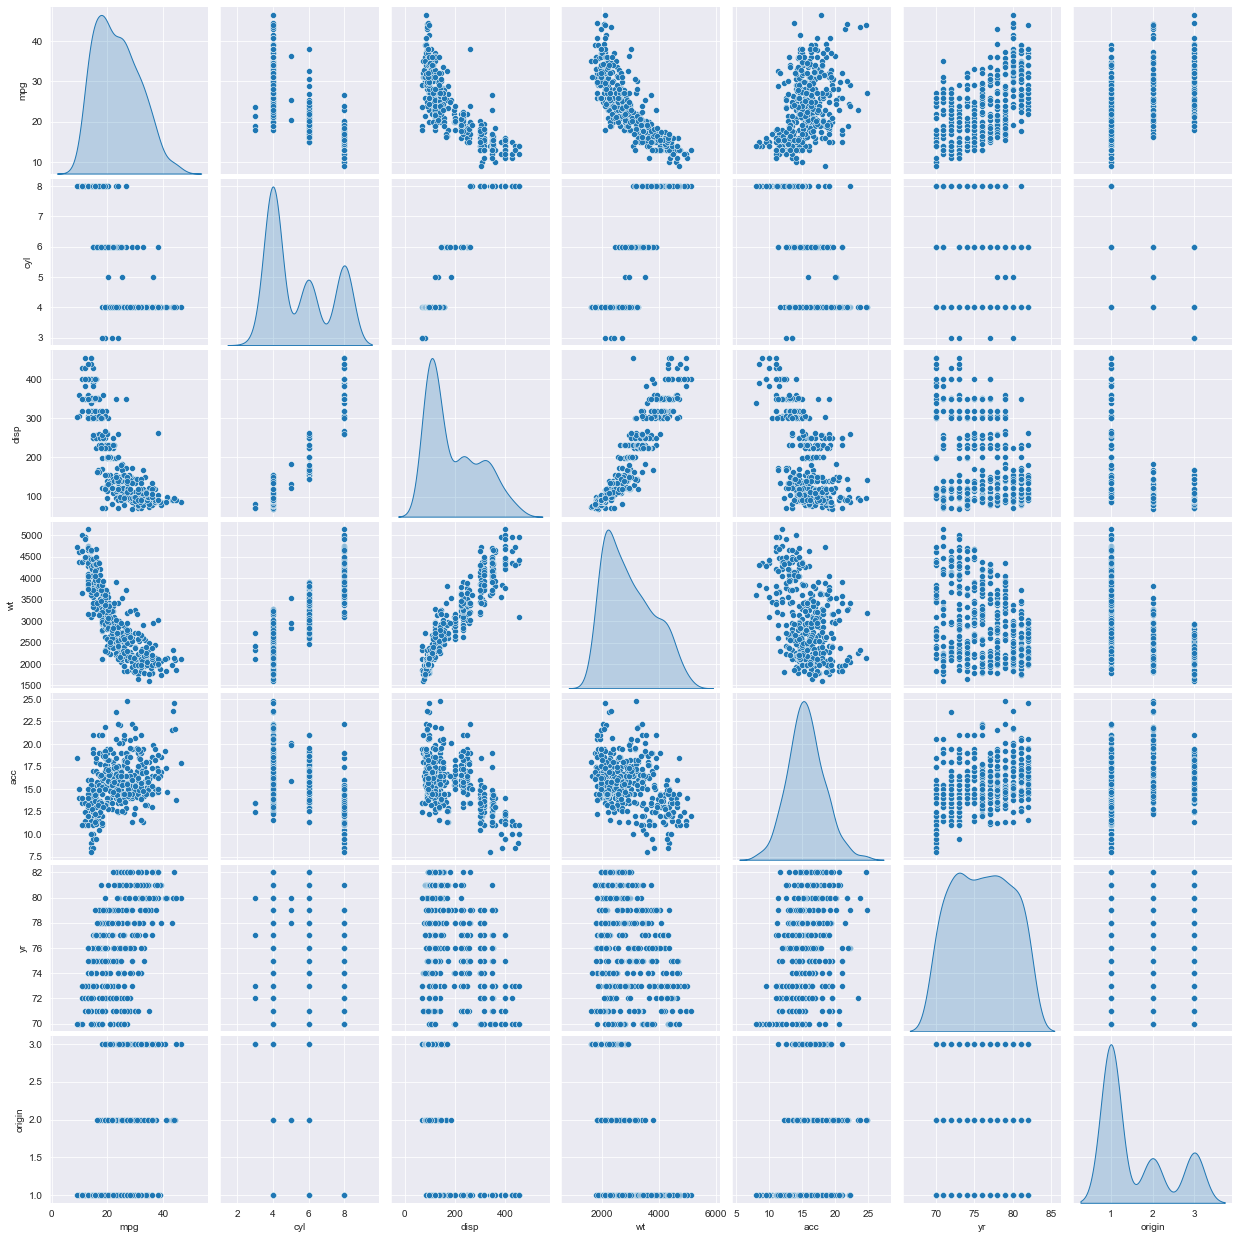

In [647]:
plt.figure(figsize=(10,5))
sns.pairplot(df_main,diag_kind='kde');
plt.show()

**2.B Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.**

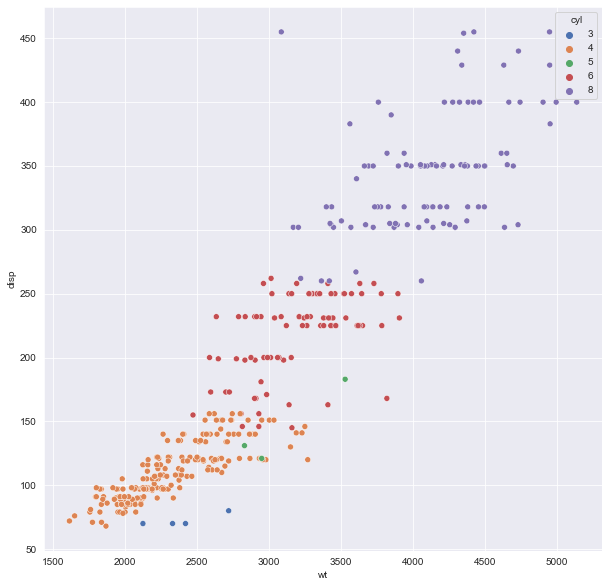

In [648]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_main, x="wt", y="disp",hue='cyl',palette="deep")
plt.show()

**2.E Share insights for Q2.d.**

### <font color=darkblue> Insights from scatterplot Q2.d:
 
    1. "disp" and "wt" shows 3 clusters with cylinder.
    
    2. 8 cylinder engines have higher  wt-to-displacement.
       
    3. Majority of cars are 4 cylinder. 

    4. Very few cars have 3 and 5 cylinders.

 **2.F Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.**

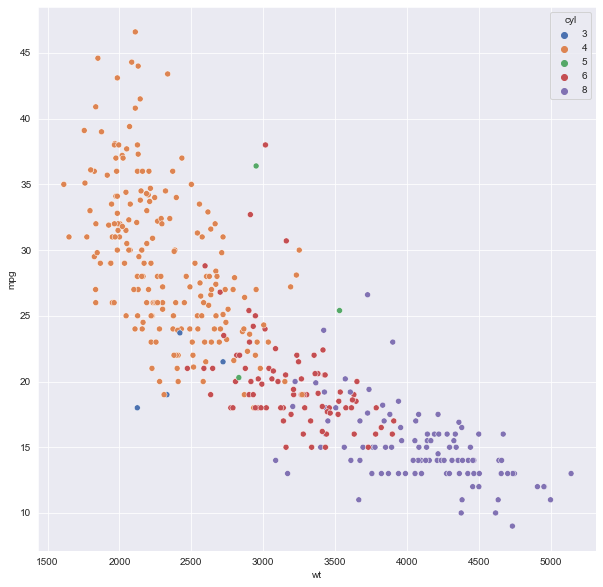

In [649]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_main, x="wt", y="mpg",hue='cyl',palette="deep")
plt.show()

**2.G Share insights for Q2.f.**

### <font color=darkblue> Insights from scatterplot Q2.f:
    
    1. 8 cylinder engines have higher fuel consumption per miles hence lower mpg.
       
    2. 3 cylinder engines have lower fuel consumption per miles hence higher mpg . 

**2.H Check for unexpected values in all the features and datapoints with such values.**

In [650]:
#Imputing the "?" with mean values
df_main['hp'].replace("?",np.nan, inplace=True)

In [651]:
df_main['hp'].isna().value_counts()

False    392
True       6
Name: hp, dtype: int64

In [652]:
df_main['hp'] = pd.to_numeric(df_main['hp'], errors="coerce" )

In [653]:
df_main['hp'] = df_main['hp'].transform(lambda x: x.fillna(x.median()))

In [654]:
df_main.drop(['car_name'],axis=1,inplace=True)

In [655]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


## 3. Clustering:

In [656]:
# Perform another kind of corrections/treatment on the data.
# Since ordinal sequence will create unrealistic pattern in origin column, we do one hot encoding for the origin column
df_main['origin'] = df_main['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_main = pd.get_dummies(df_main, columns=['origin'])
df_main.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [657]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


**3.A Apply K-Means clustering for 2 to 10 clusters.**

**3.B Plot a visual and ind elbow point.**

In [658]:
#Scale the data 
car_data_scaled=df_main.copy()
car_data_scaled=car_data_scaled.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

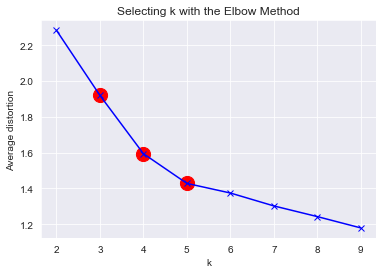

In [659]:
# Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_data_scaled)
    prediction=model.predict(car_data_scaled)
    meanDistortions.append(sum(np.min(cdist(car_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.scatter([clusters[1],clusters[2],clusters[3]],[meanDistortions[1],meanDistortions[2],meanDistortions[3]], marker='o', color='r',s=200)
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**3.C On the above visual, highlight which are the possible Elbow points.**

### <font color=darkblue> Observation:
    From above figure we find that 3, 4 or 5 can be optimal number of clusters 

**3.D Train a K-means clustering model once again on the optimal number of clusters.**

**3.E Add a new feature in the DataFrame which will have labels based upon cluster value.**

**3.F Plot a visual and color the datapoints based upon clusters.**

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
GROUP,,,,,,,,,,
0,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.0,0.000000,0.000000
1,23.686577,5.087248,178.473154,90.510067,2848.523490,16.585906,76.859060,1.0,0.000000,0.000000
2,29.248322,4.127517,105.731544,80.348993,2316.161074,16.461074,76.677852,0.0,0.530201,0.469799


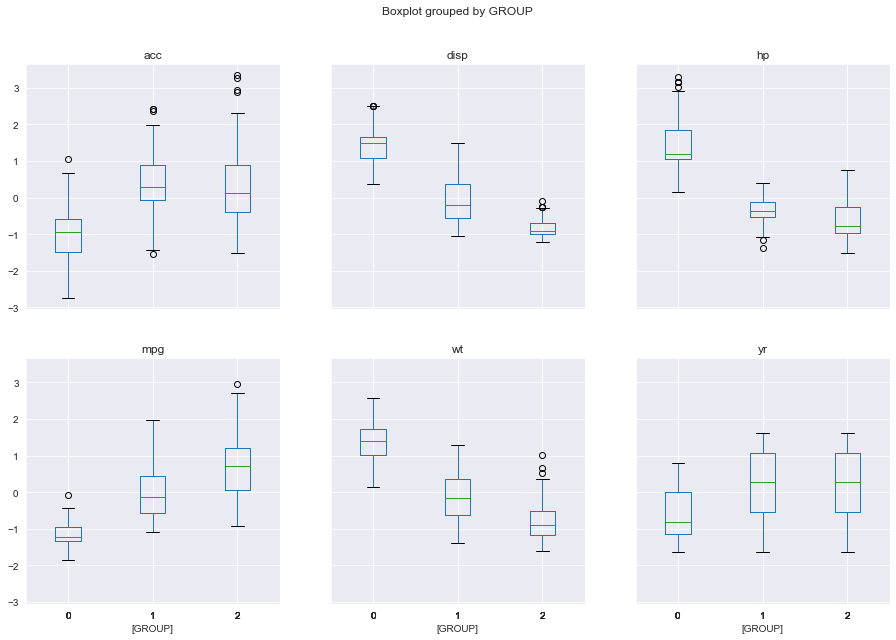

In [660]:
# Modeling for 3 clusters
def k_means_cluster(data, data_scaled, n):
    final_model=KMeans(n)
    final_model.fit(data_scaled)
    prediction=final_model.predict(data_scaled)

    #Append the prediction 
    data_clustered = data.copy()
    data_scaled_clustered = data_scaled.copy()
    data_clustered["GROUP"] = prediction
    data_scaled_clustered["GROUP"] = prediction

    data_clustered_grouped = data_clustered.groupby(['GROUP'])
    display(data_clustered_grouped.mean())
    data_scaled_clustered[['acc', 'disp', 'hp', 'mpg', 'wt', 'yr', 'GROUP']].boxplot(by='GROUP', layout = (2,3),figsize=(15,10));

car_data_2cluster_scaled = k_means_cluster(df_main, car_data_scaled, 3)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
GROUP,,,,,,,,,,
0,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.0,0.0,0.0
1,23.686577,5.087248,178.473154,90.510067,2848.523490,16.585906,76.859060,1.0,0.0,0.0
2,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038,0.0,1.0,0.0
3,27.891429,4.157143,109.142857,80.928571,2423.300000,16.787143,75.814286,0.0,0.0,1.0


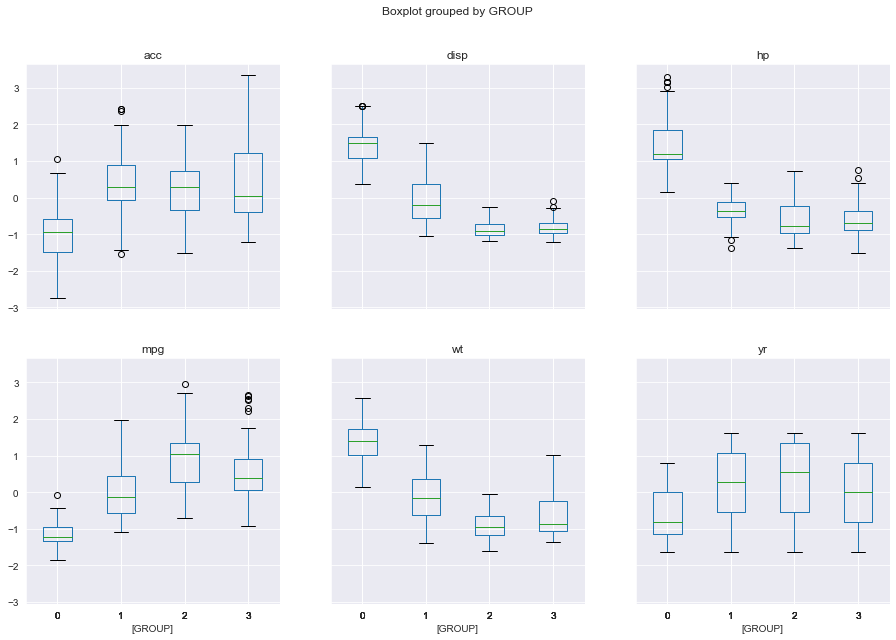

In [661]:
# Modeling for 4 clusters
car_data_2cluster_scaled = k_means_cluster(df_main, car_data_scaled, 4)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
GROUP,,,,,,,,,,
0,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038,0.0,1.0,0.0
1,19.202564,6.230769,236.089744,100.955128,3292.500000,16.680769,75.641026,1.0,0.0,0.0
2,27.877922,4.129870,128.707792,83.136364,2460.467532,16.364935,78.194805,1.0,0.0,0.0
3,27.891429,4.157143,109.142857,80.928571,2423.300000,16.787143,75.814286,0.0,0.0,1.0
4,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.0,0.0,0.0


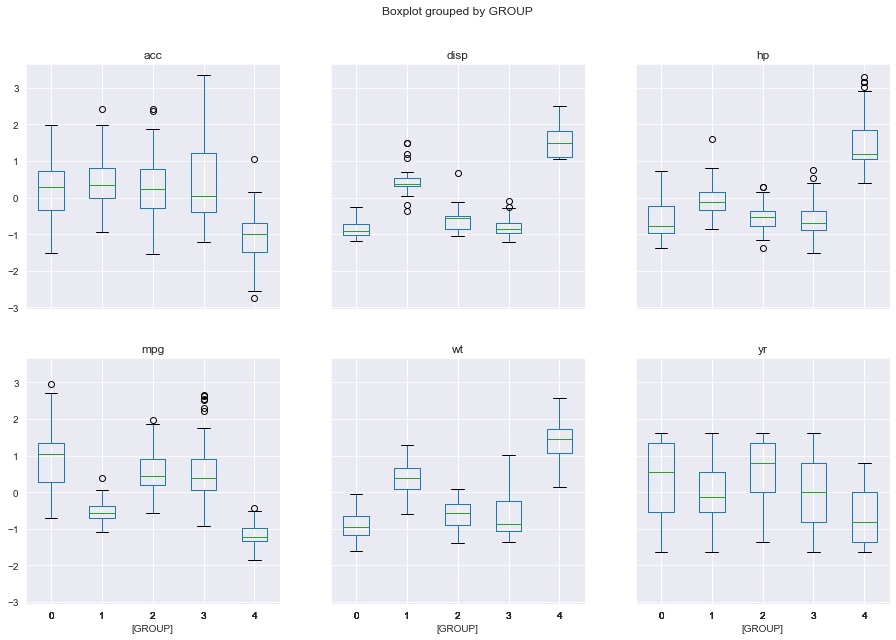

In [662]:
# Modeling for 5 clusters
car_data_4cluster_scaled = k_means_cluster(df_main , car_data_scaled, 5)

**3.G Pass a new DataPoint and predict which cluster it belongs to.**

In [663]:
model=KMeans(4)
model.fit(car_data_scaled)
with open('model_pickle', 'wb') as f:  #To save as binary
    pickle.dump(model,f)

In [698]:
with open('model_pickle' , 'rb') as f:
    lr = pickle.load(f) 

col=car_data_scaled.iloc[25,:].values.reshape(1, -1)
pred = lr.predict(col)
print(f'It belongs to GROUP: {pred[0]}')

It belongs to GROUP: 1


# PART-B

**DOMAIN**: Automobile

**CONTEXT**: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

**DATA DESCRIPTION**: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more dif icult to
distinguish between the cars.

- All the features are numeric i.e. geometric features extracted from the silhouette.

**PROJECT OBJECTIVE**: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

## 1. Data Understanding & Cleaning:

**1.A Read ‘vehicle.csv’ and save as DataFrame.**

In [665]:
data = pd.read_csv('vehicle.csv')
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [666]:
data.shape

(846, 19)

**1.B Check percentage of missing values and impute with correct approach.**

In [667]:
for column in data.columns:
    val = data[column].isnull().sum()/len(data[column])
    print(f"The percentage of null values in {column}: {val} %")

The percentage of null values in compactness: 0.0 %
The percentage of null values in circularity: 0.00591016548463357 %
The percentage of null values in distance_circularity: 0.004728132387706856 %
The percentage of null values in radius_ratio: 0.0070921985815602835 %
The percentage of null values in pr.axis_aspect_ratio: 0.002364066193853428 %
The percentage of null values in max.length_aspect_ratio: 0.0 %
The percentage of null values in scatter_ratio: 0.001182033096926714 %
The percentage of null values in elongatedness: 0.001182033096926714 %
The percentage of null values in pr.axis_rectangularity: 0.0035460992907801418 %
The percentage of null values in max.length_rectangularity: 0.0 %
The percentage of null values in scaled_variance: 0.0035460992907801418 %
The percentage of null values in scaled_variance.1: 0.002364066193853428 %
The percentage of null values in scaled_radius_of_gyration: 0.002364066193853428 %
The percentage of null values in scaled_radius_of_gyration.1: 0.0047

In [668]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [669]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**We will impute the missing values with mean values in their corresponding columns**

In [670]:
for i in data.columns:
    if data[i].dtype != "object":
        mean = data[i].mean()
        data[i] = data[i].fillna(mean)

In [671]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**1.C Visualize a Pie-chart and print percentage of values for variable ‘class’.**

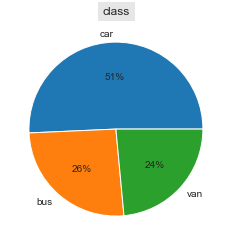

In [672]:
abc = data['class'].value_counts()
plt.pie(abc,autopct='%.0f%%',labels=data['class'].value_counts().index)
plt.title('class',bbox={'facecolor':'0.9', 'pad':5})
plt.show()
# data['class'].value_counts().plot(kind='pie', autopct='%1.0f%%',labels=data['class'].value_counts().index)
# plt.title('class',bbox={'facecolor':'0.9', 'pad':5})

**1.D Check for duplicate rows in the data and impute with correct approach.**

In [673]:
print(f'Total duplicate rows: {data.duplicated().sum()}')

Total duplicate rows: 0


## 2. Data Preparation:

**2.A Split data into X and Y. [Train and Test optional]**

In [674]:
X = data.drop(['class'],axis=1)
y = data[['class']]

**2.B Standardize the Data.**

In [675]:
X_scaled=X.apply(zscore)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


## 3. Model Building:

**3.A Train a base Classification model using SVM.**

In [676]:
#Label encoding the target "class" column
y.replace(['van','car','bus'],[1,2,3],inplace=True)
y

,class
0,1
1,1
2,2
3,1
4,3
...,...
841,2
842,1
843,2
844,2


In [677]:
# Splitting the model 7:3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [678]:
svm=SVC() #Default hyperparameters
svm.fit(X_train,y_train)
test_pred=svm.predict(X_test)
train_pred=svm.predict(X_train)

**3.B Print Classification metrics for train data.**

In [679]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       137
           2       0.97      0.98      0.98       296
           3       0.99      0.97      0.98       159

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592



**3.C Apply PCA on the data with 10 components.**

In [680]:
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [681]:
pca10 = PCA(n_components=10)
pca10.fit(X_scaled)

PCA(n_components=10)

In [682]:
print(pca10.explained_variance_) ## Eigen values

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [683]:
print(pca10.components_) ## Eigen vectors

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [684]:
print(pca10.explained_variance_ratio_) ## Percentage of variation explained by each eigen Vector

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


**3.D Visualize Cumulative Variance Explained with Number of Components.**

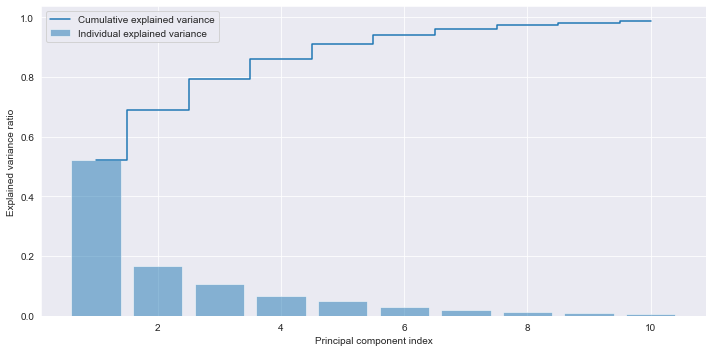

In [685]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(list(range(1,11)), pca10.explained_variance_ratio_, alpha=0.5, align = 'center', label = 'Individual explained variance')
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**3.E Draw a horizontal line on the above plot to highlight the threshold of 90%.**

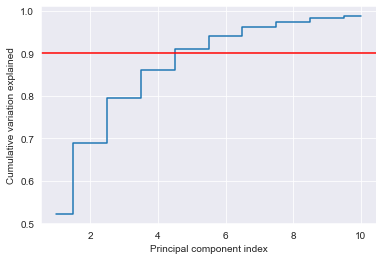

In [686]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.ylabel('Cumulative variation explained')
plt.xlabel('Principal component index')
plt.show()

**3.F Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.**

- From the elbow plot we can see that around 90% variance is covered by 5 dimensions. 
- We can now reduce the dimension by considering first 5 principle components and trasnform the scaled data by applying PCA.

In [687]:
pca_8 = PCA(n_components=8)
pca_8.fit(X_scaled)
print(pca_8.components_)
print(pca_8.explained_variance_ratio_)
Xpca_8 = pca_8.transform(X_scaled)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

**3.G Train SVM model on components selected from above step.**

In [688]:
#Split the Dataset formed after PCA
Xpca_train, Xpca_test, y_train, y_test = train_test_split(Xpca_8, y, test_size=0.3, random_state=1)

In [689]:
svm=SVC() #Default hyperparameters
svm.fit(Xpca_train,y_train)
pca8_test_pred=svm.predict(Xpca_test)
pca8_train_pred=svm.predict(Xpca_train)
# print('Accuracy Score:',end='')
# print(sklearn.metrics.accuracy_score(y_test,pca5_test_pred))
# acc_after_pca=sklearn.metrics.accuracy_score(y_test,pca5_train_pred)

**3.H Print Classification metrics for train data of above model and share insights.**

In [690]:
print(classification_report(y_train,pca8_train_pred))

              precision    recall  f1-score   support

           1       0.93      0.94      0.93       137
           2       0.97      0.97      0.97       296
           3       0.98      0.96      0.97       159

    accuracy                           0.96       592
   macro avg       0.96      0.96      0.96       592
weighted avg       0.96      0.96      0.96       592



## 4. Performance Improvement:

**4.A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.**

In [691]:
parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_PCA_SVC_grid=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_PCA_SVC_grid

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [692]:
best_PCA_SVC_grid.fit(Xpca_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [693]:
best_PCA_SVC_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [694]:
best_PCA_SVC=SVC(C=1,kernel='rbf',random_state=1)
best_PCA_SVC

SVC(C=1, random_state=1)

In [695]:
best_PCA_SVC=best_PCA_SVC.fit(Xpca_train,y_train)
best_test_pred=best_PCA_SVC.predict(Xpca_test)
best_train_pred=best_PCA_SVC.predict(Xpca_train)

**4.B Share best Parameters observed from above step.**

In [696]:
best_PCA_SVC_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

**4.C Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights.**

### <font color=darkblue> Insights on relative performance of models:
     A. SVM before PCA has an acuuracy of 97%.
        
     B. SVM after PCA with best parameters has accuracy of 96% but with only 8 parameters.

In [697]:
print('Accuracy for SVC before PCA:')
print(classification_report(y_train,train_pred))
print('-'*100)
print('Accuracy for SVC after PCA with default parameters:')
print(classification_report(y_train,pca8_train_pred))
print('-'*100)
print('Accuracy for SVC after PCA with best parameters:')
print(classification_report(y_train,best_train_pred))

Accuracy for SVC before PCA:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       137
           2       0.97      0.98      0.98       296
           3       0.99      0.97      0.98       159

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592

----------------------------------------------------------------------------------------------------
Accuracy for SVC after PCA with default parameters:
              precision    recall  f1-score   support

           1       0.93      0.94      0.93       137
           2       0.97      0.97      0.97       296
           3       0.98      0.96      0.97       159

    accuracy                           0.96       592
   macro avg       0.96      0.96      0.96       592
weighted avg       0.96      0.96      0.96       592

--------------------------------------------------------

## 5. Data Understanding & Cleaning:

**5.A Explain pre-requisite/assumptions of PCA.**

1. Assumes the data set to be linear combinations of the variables .

2. PCA assumes that the principal component with high variance should be given more importance and the PCs with lower variance are disregarded as noise.

3. The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

**5.B Explain advantages and limitations of PCA.**

**Advantages:**
1. Removes Correlated Features.
2. Improves Algorithm Performance.
3. Reduces Overfitting.
4. Improves Visualization.

**Limitations:**
1. Independent variables become less interpretable.
2. Loss of information.
3. Data normalization is required.